<div>
<h2> Theory</h2>
<img src="img/dim-reduction-1.jpeg" alt="Drawing" style="height: 400px;"/>
<img src="img/dim-reduction-2.jpeg" alt="Drawing" style="height: 600px;"/>
<img src="img/dim-reduction-3.jpeg" alt="Drawing" style="height: 200px;"/>
</div>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
X, y = data.iloc[:, :-1], data.iloc[: , -1]

In [4]:
print(f'Input shape - {X.shape} Output shape - {y.shape}')

Input shape - (2000, 20) Output shape - (2000,)


In [9]:
# normalizing data
u = X.mean(axis=0)
sig = X.std(axis=0)
X = (X-u)/sig
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902372,-0.989802,0.830572,-1.018929,-0.762304,-1.043705,-1.380298,0.340654,1.348911,-1.101696,-1.305424,-1.408596,-1.146497,0.391605,-0.784787,0.283032,1.462128,-1.786414,-1.005767,0.985850
1,-0.495015,1.009798,-1.252751,0.980932,-0.992642,0.957646,1.154735,0.687376,-0.120029,-0.664602,-0.645827,0.585631,1.704039,0.467200,1.113987,-0.635158,-0.734084,0.559501,0.993769,-1.013846
2,-1.537302,1.009798,-1.252751,0.980932,-0.531966,0.957646,0.493422,1.380820,0.134210,0.209587,-0.645827,1.392336,1.074699,0.441387,-0.310094,-0.864705,-0.368048,0.559501,0.993769,-1.013846
3,-1.418964,1.009798,1.198217,-1.018929,-0.992642,-1.043705,-1.214970,1.034098,-0.261274,0.646681,-0.151130,1.286428,1.236662,0.594421,0.876640,0.512579,-0.002013,0.559501,-1.005767,-1.013846
4,1.325574,1.009798,-0.394912,-1.018929,2.001753,0.957646,0.658751,0.340654,0.021215,-1.101696,0.673365,1.268401,-0.091429,-0.657502,-1.022134,-0.864705,0.730057,0.559501,0.993769,-1.013846


In [10]:
from sklearn.feature_selection import SelectKBest

best_features = SelectKBest()
best_features.fit(X, y)
best_features.scores_

array([3.15981575e+01, 4.76767709e-01, 4.93707801e-01, 4.28239286e-01,
       7.72181960e-01, 1.05952453e+00, 2.92299608e+00, 1.50068244e+00,
       3.59431819e+00, 2.62541515e+00, 8.25446358e-01, 1.94848418e+01,
       2.26208825e+01, 3.52011082e+03, 2.22598374e+00, 1.67099983e+00,
       1.62881131e+00, 4.57319750e-01, 1.29330223e+00, 2.84940470e-01])

In [91]:
df_scores = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns, df_scores], axis=1) 
feature_scores.columns = ['features', 'score']
feature_scores = feature_scores.sort_values(by='score', ascending=False)
feature_scores

,features,score
13,ram,3520.110824
0,battery_power,31.598158
12,px_width,22.620882
11,px_height,19.484842
8,mobile_wt,3.594318
6,int_memory,2.922996
9,n_cores,2.625415
14,sc_h,2.225984
15,sc_w,1.671000
16,talk_time,1.628811


## Model comparison

In [47]:
top_5 = list(feature_scores[:5]['features'].values)
top_5

['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt']

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [45]:
# with all the features
model_all = LogisticRegression()
model_all.fit(X, y)
cross_val_score(model_all, X, y, cv=10).mean()

np.float64(0.9620000000000001)

In [48]:
# with top 5 features
model_top_5 = LogisticRegression()
model_top_5.fit(X[top_5], y)
cross_val_score(model_top_5, X[top_5], y, cv=10).mean()

np.float64(0.9704999999999998)

## Visualizing top most and bottom most features with o/p

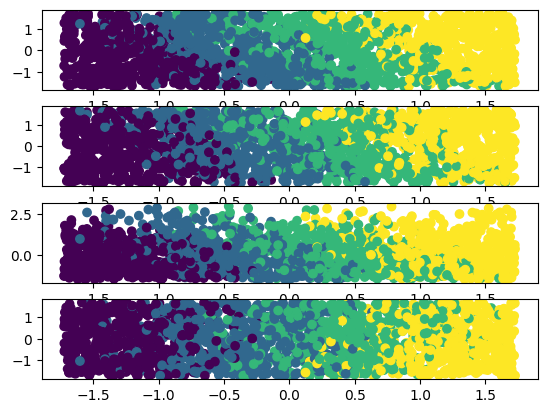

In [92]:
# visualizing top 5 features
import matplotlib.pyplot as plt
import numpy as np
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.scatter(X[top_5[0]], X[top_5[i+1]], c=y, cmap='viridis')

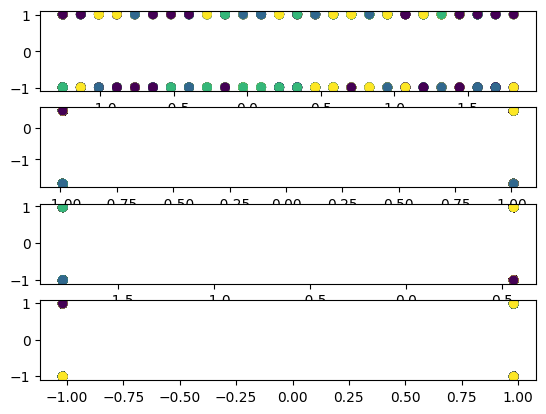

In [95]:
# visualizing bottom 5 features
bottom_5 = list(feature_scores[-5:]['features'].values)
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.scatter(X[bottom_5[i]], X[bottom_5[i+1]], c=y, cmap='viridis')